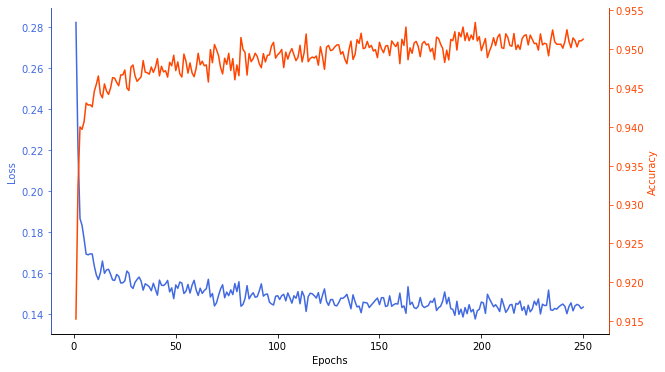

In [28]:
import matplotlib.pyplot as plt
import json

with open('./FINAL_RUN/training_data.json', 'r') as f:
    graph_data = json.load(f)

loss = graph_data['Loss']
accuracy = graph_data['Accuracy']

assert(len(loss) == len(accuracy))

col1 = 'royalblue'
col2 = 'orangered'

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(range(1, len(loss) + 1), loss, col1)
ax2.plot(range(1, len(accuracy) + 1), accuracy, col2)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=col1)
ax2.set_ylabel('Accuracy', color=col2)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_color(col1)
ax2.spines['right'].set_color(col2)

ax1.tick_params(axis='y', colors=col1)
ax2.tick_params(axis='y', colors=col2)


plt.savefig('loss-accuracy.png', dpi=500)
plt.show()


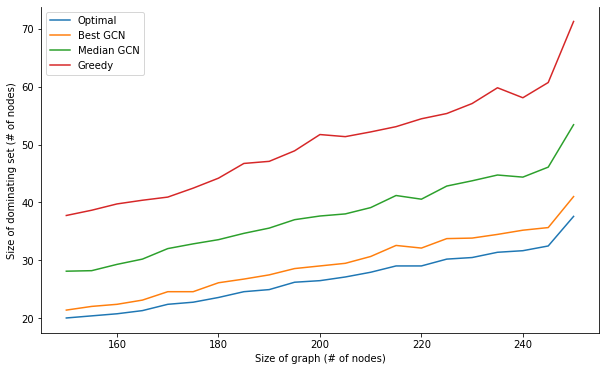

In [2]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from statistics import mean

data = None

files = ['./final-results.json', './final-extend-results.json']
plot_num = 0
output_file = 'performance.png' if plot_num == 0 else 'performance-extend.png'

with open(files[plot_num], 'r') as f:
    data = json.load(f)



gamma = defaultdict(list)
best = defaultdict(list)
median = defaultdict(list)
greedy = defaultdict(list)


for graph in data:

    proc = graph.split('_')
    nodes = int(proc[0]) if plot_num == 1 else int(proc[1][1:])

    if plot_num == 0:
        gamma[nodes].append(data[graph]["gamma"])

    best[nodes].append(data[graph]["best"])
    median[nodes].append(data[graph]["median"])
    greedy[nodes].append(data[graph]["greedy"])


for size in best:
    if plot_num == 0:
        gamma[size] = mean(gamma[size])
    best[size] = mean(best[size])
    median[size] = mean(median[size])
    greedy[size] = mean(greedy[size])

if plot_num == 0:
    gamma_graph = sorted(list(gamma.items()))

best_graph = sorted(list(best.items()))
median_graph = sorted(list(median.items()))
greedy_graph = sorted(list(greedy.items()))


fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.spines['top'].set_visible(False)

if plot_num == 0:
    plt.plot([x[0] for x in gamma_graph], [x[1] for x in gamma_graph], label="Optimal")

plt.plot([x[0] for x in best_graph], [x[1] for x in best_graph], label = "Best GCN")
plt.plot([x[0] for x in median_graph], [x[1] for x in median_graph], label="Median GCN")
plt.plot([x[0] for x in greedy_graph], [x[1] for x in greedy_graph], label="Greedy")

plt.xlabel('Size of graph (# of nodes)')
plt.ylabel('Size of dominating set (# of nodes)')
plt.legend()

plt.savefig(output_file, dpi=500)
plt.show()

In [20]:
import scipy.io as sio

optimal = []
gcn = []
greedy = []

files = ['./final-results.json', './final-extend-results.json']
plot_num = 0

with open(files[plot_num], 'r') as f:
    data = json.load(f)

for graph in data:
    gcn.append(data[graph]['runtime'])
    greedy.append(data[graph]['greedy_time'])

    if plot_num == 0:
        mat_contents = sio.loadmat(f'./test/{graph}')
        op = mat_contents['solution_runtime']
        optimal.append(op[0][0])

if plot_num == 0:  
    print(f'Optimal Avg: {mean(optimal)}')
print(f'GCN Avg: {mean(gcn)}')
print(f'Greedy Avg: {mean(greedy)}')


Optimal Avg: 19085.78420969761
GCN Avg: 2.2635115327288924
Greedy Avg: 0.00011221217689010014
